In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
data.drop("Id",axis=1,inplace=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
X = data.iloc[:,:-1]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


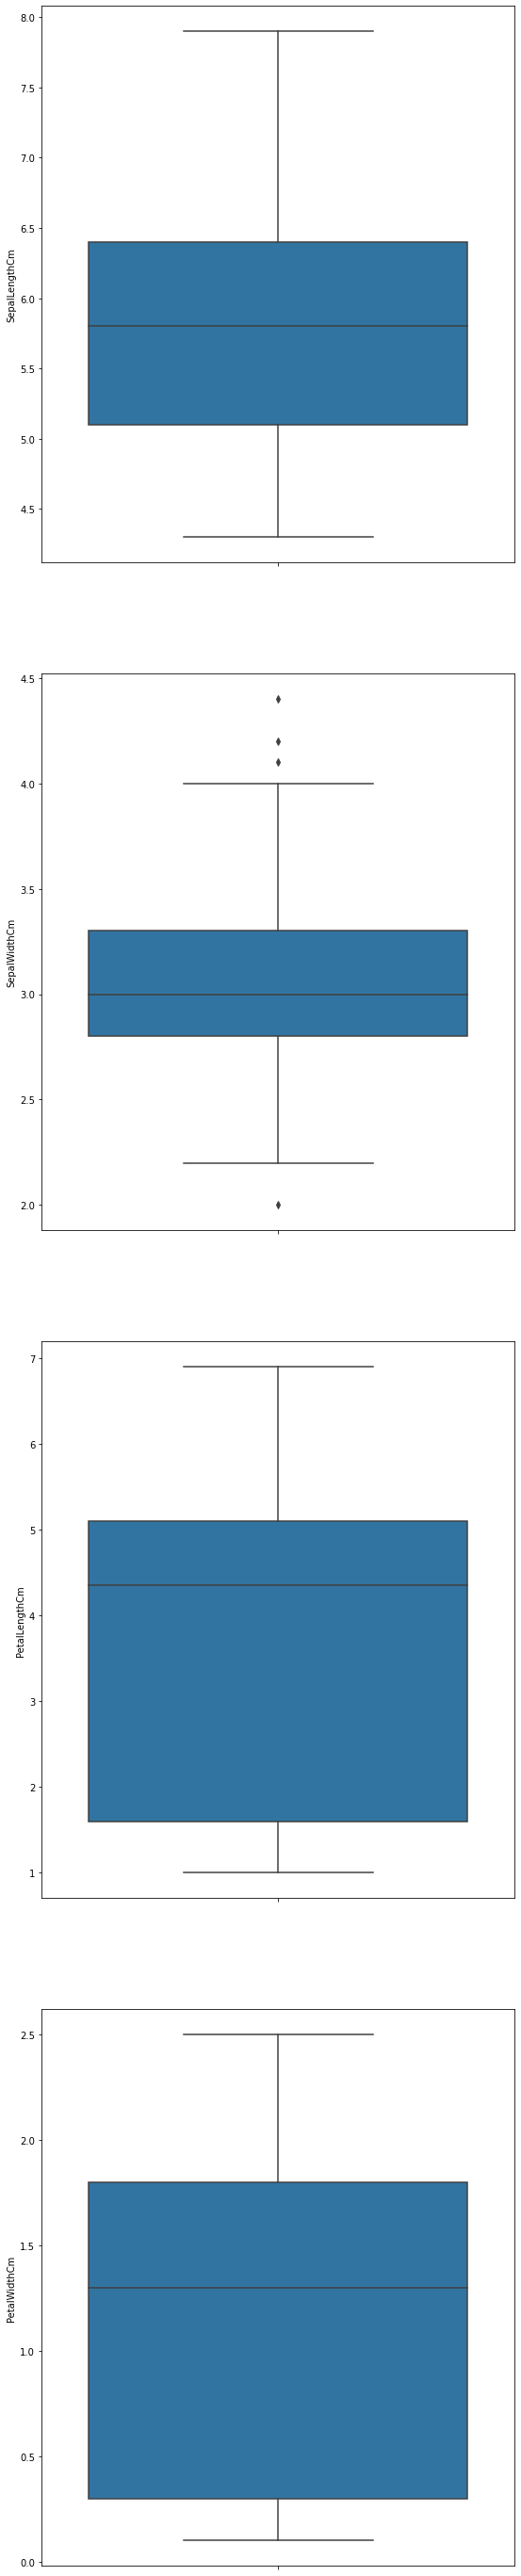

In [7]:
columns_name = X.columns
fig, axes = plt.subplots(nrows=len(columns_name), figsize=(9, 50))
for i in range(len(columns_name)):
    sns.boxplot(ax=axes[i], y=columns_name[i], data=data)

In [8]:
def outlier_t(datacolumn):
    sorted (datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range,upper_range

In [9]:
for col in X.columns:
    lowerbound,upperbound= outlier_t(data[col])
    data[col]=np.clip(data[col],a_min=lowerbound,a_max=upperbound)

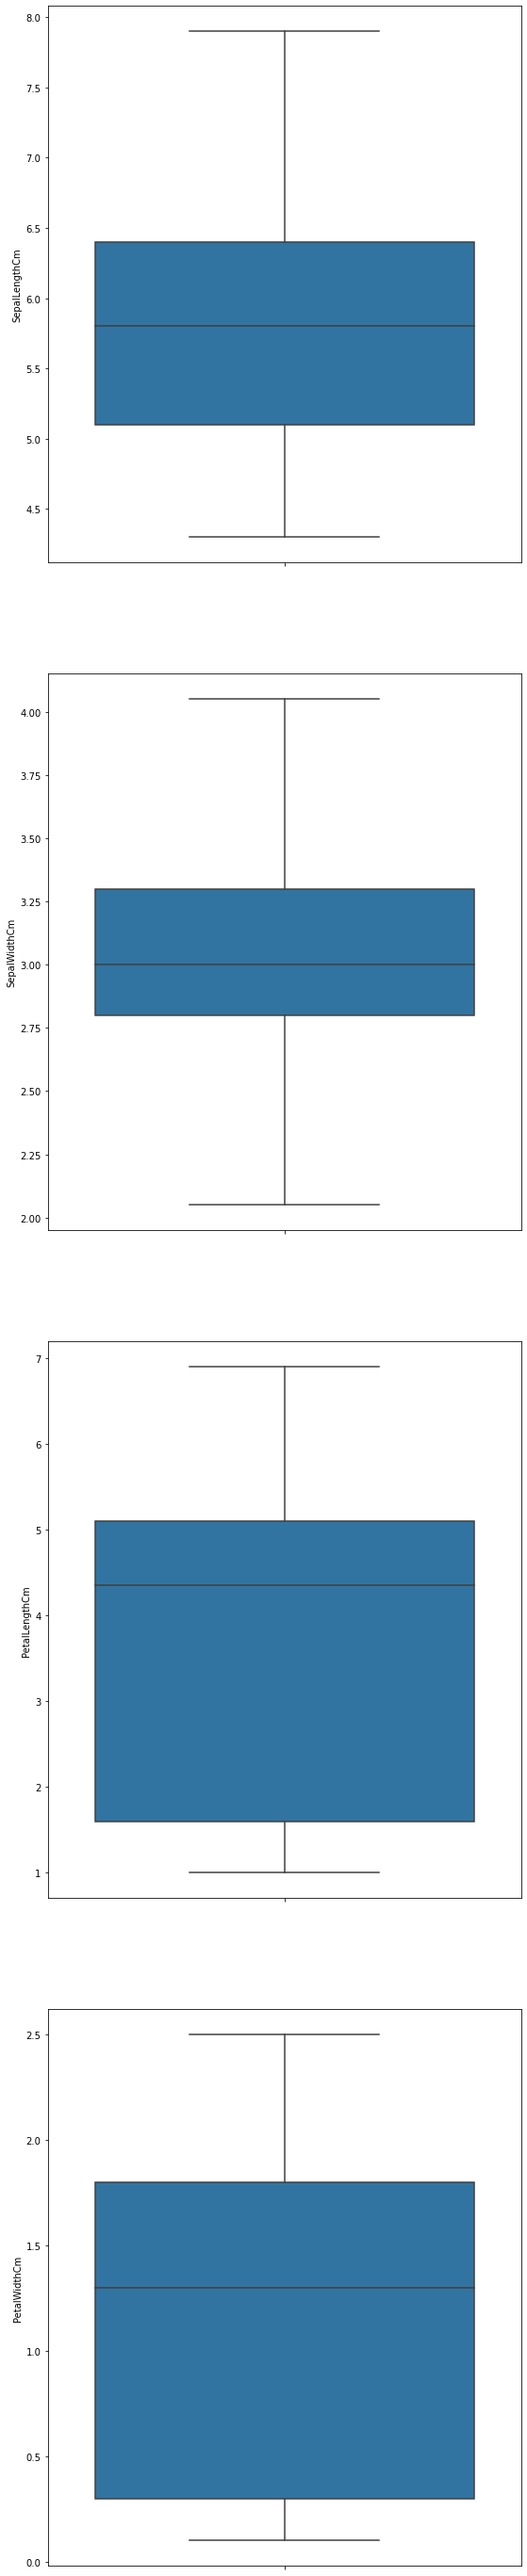

In [10]:
columns_name = X.columns
fig, axes = plt.subplots(nrows=len(columns_name), figsize=(9, 50))
for i in range(len(columns_name)):
    sns.boxplot(ax=axes[i], y=columns_name[i], data=data)

In [11]:
XS=data.iloc[:,:-1]
cols=XS.columns
XS= StandardScaler().fit_transform(XS)
data1=pd.DataFrame(XS,columns=cols)

In [12]:
data1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.065722,-1.341272,-1.312977
1,-1.143017,-0.120170,-1.341272,-1.312977
2,-1.385353,0.354187,-1.398138,-1.312977
3,-1.506521,0.117008,-1.284407,-1.312977
4,-1.021849,1.302901,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.120170,0.819624,1.447956
146,0.553333,-1.306063,0.705893,0.922064
147,0.795669,-0.120170,0.819624,1.053537
148,0.432165,0.828544,0.933356,1.447956


# K means

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


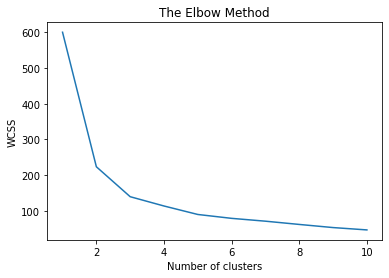

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.5798857604435109
For n_clusters = 3 The average silhouette_score is : 0.4609853948682445
For n_clusters = 4 The average silhouette_score is : 0.4209094249343606
For n_clusters = 5 The average silhouette_score is : 0.3565431238037356
For n_clusters = 6 The average silhouette_score is : 0.3351442247228347
For n_clusters = 7 The average silhouette_score is : 0.34284766677122397
For n_clusters = 8 The average silhouette_score is : 0.3630702549860579


In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data1)

In [16]:
kmeans.cluster_centers_

array([[ 1.13597027,  0.10691537,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84514617, -1.30487835, -1.25512862],
       [-0.05021989, -0.89211946,  0.34753171,  0.28206327]])

In [17]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [18]:
data['cluster_k']=y_kmeans
data.set_index("Species",inplace=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_k
Species,,,,,
Iris-setosa,5.1,3.5,1.4,0.2,1
Iris-setosa,4.9,3.0,1.4,0.2,1
Iris-setosa,4.7,3.2,1.3,0.2,1
Iris-setosa,4.6,3.1,1.5,0.2,1
Iris-setosa,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
Iris-virginica,6.7,3.0,5.2,2.3,0
Iris-virginica,6.3,2.5,5.0,1.9,2
Iris-virginica,6.5,3.0,5.2,2.0,0


In [19]:
data[data["cluster_k"]==0]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_k
Species,,,,,
Iris-versicolor,7.0,3.2,4.7,1.4,0
Iris-versicolor,6.4,3.2,4.5,1.5,0
Iris-versicolor,6.9,3.1,4.9,1.5,0
Iris-versicolor,6.3,3.3,4.7,1.6,0
Iris-versicolor,6.7,3.1,4.4,1.4,0
Iris-versicolor,5.9,3.2,4.8,1.8,0
Iris-versicolor,6.6,3.0,4.4,1.4,0
Iris-versicolor,6.8,2.8,4.8,1.4,0
Iris-versicolor,6.7,3.0,5.0,1.7,0


# K means PCA

In [20]:
data1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110343,0.871754,0.817954
SepalWidthCm,-0.110343,1.000000,-0.419823,-0.355582
PetalLengthCm,0.871754,-0.419823,1.000000,0.962757
PetalWidthCm,0.817954,-0.355582,0.962757,1.000000


In [21]:
data1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.065722,-1.341272,-1.312977
1,-1.143017,-0.120170,-1.341272,-1.312977
2,-1.385353,0.354187,-1.398138,-1.312977
3,-1.506521,0.117008,-1.284407,-1.312977
4,-1.021849,1.302901,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.120170,0.819624,1.447956
146,0.553333,-1.306063,0.705893,0.922064
147,0.795669,-0.120170,0.819624,1.053537
148,0.432165,0.828544,0.933356,1.447956


In [22]:
data1.iloc[:,2:]

,PetalLengthCm,PetalWidthCm
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977
...,...,...
145,0.819624,1.447956
146,0.705893,0.922064
147,0.819624,1.053537
148,0.933356,1.447956


In [23]:
pca = PCA(n_components = 1)
datap1 = pca.fit_transform(data1.iloc[:,0:2])
datap2 = pca.fit_transform(data1.iloc[:,2:])
explained_variance_p2 = pca.explained_variance_ratio_
explained_variance_p1 = pca.explained_variance_ratio_

In [24]:
explained_variance_p1

array([0.98137855])

In [25]:
explained_variance_p2 

array([0.98137855])

In [26]:

visual=datap1
visual= pd.DataFrame(visual)
visual['param1']=datap1
visual['param2']=datap2
visual=visual.iloc[:,1:]
visual

,param1,param2
0,-1.390457,-1.876838
1,-0.723262,-1.876838
2,-1.230040,-1.917048
3,-1.148008,-1.836627
4,-1.643846,-1.876838
...,...,...
145,0.818954,1.603421
146,1.314792,1.151139
147,0.647596,1.324525
148,-0.280282,1.683841


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


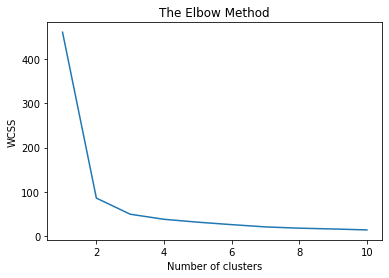

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(visual)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(visual)
    silhouette_avg = silhouette_score(visual, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7275974542753689
For n_clusters = 3 The average silhouette_score is : 0.553285495885533
For n_clusters = 4 The average silhouette_score is : 0.5475437395022476
For n_clusters = 5 The average silhouette_score is : 0.5261128562340667
For n_clusters = 6 The average silhouette_score is : 0.4163939774427611
For n_clusters = 7 The average silhouette_score is : 0.41856200619211215
For n_clusters = 8 The average silhouette_score is : 0.41159568472517066


In [29]:
kmeans_2 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_pca_2 = kmeans_2.fit_predict(visual)

In [30]:
kmeans_2.cluster_centers_

array([[ 0.79030705,  1.5066947 ],
       [-1.31502426, -1.81019829],
       [ 0.52992485,  0.32709558]])

In [31]:
y_kmeans_pca_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
data['cluster_k_pca']=y_kmeans_pca_2
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_k,cluster_k_pca
Species,,,,,,
Iris-setosa,5.1,3.5,1.4,0.2,1,1
Iris-setosa,4.9,3.0,1.4,0.2,1,1
Iris-setosa,4.7,3.2,1.3,0.2,1,1
Iris-setosa,4.6,3.1,1.5,0.2,1,1
Iris-setosa,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
Iris-virginica,6.7,3.0,5.2,2.3,0,0
Iris-virginica,6.3,2.5,5.0,1.9,2,0
Iris-virginica,6.5,3.0,5.2,2.0,0,0


In [33]:
data[data['cluster_k_pca']==2]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_k,cluster_k_pca
Species,,,,,,
Iris-versicolor,7.0,3.20,4.7,1.4,0,2
Iris-versicolor,6.4,3.20,4.5,1.5,0,2
Iris-versicolor,6.9,3.10,4.9,1.5,0,2
Iris-versicolor,5.5,2.30,4.0,1.3,2,2
Iris-versicolor,6.5,2.80,4.6,1.5,2,2
Iris-versicolor,5.7,2.80,4.5,1.3,2,2
Iris-versicolor,6.3,3.30,4.7,1.6,0,2
Iris-versicolor,4.9,2.40,3.3,1.0,2,2
Iris-versicolor,6.6,2.90,4.6,1.3,2,2


In [34]:
type(visual)

pandas.core.frame.DataFrame

In [35]:
visual=visual.to_numpy()

In [36]:
type(visual)

numpy.ndarray

In [50]:
import warnings
warnings.simplefilter("ignore")

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


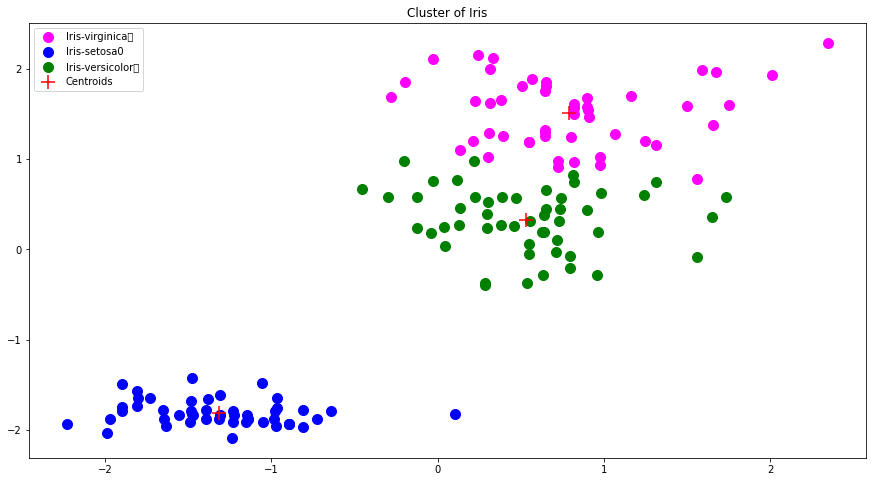

In [37]:
fig = plt.figure(figsize = (15,8))
plt.scatter(visual[y_kmeans_pca_2==0,0],visual[y_kmeans_pca_2==0,1],s=100,c='magenta',label="Iris-virginica	")
plt.scatter(visual[y_kmeans_pca_2==1,0],visual[y_kmeans_pca_2==1,1],s=100,c='blue',label='Iris-setosa0')
plt.scatter(visual[y_kmeans_pca_2==2,0],visual[y_kmeans_pca_2==2,1],s=100,c='green',label='Iris-versicolor	')
plt.scatter(kmeans_2.cluster_centers_[:,0],kmeans_2.cluster_centers_[:,1],s=200,c='red',label='Centroids',marker = "+")
plt.title('Cluster of Iris')
plt.legend()
plt.ioff()
plt.show()

# Hierarchical

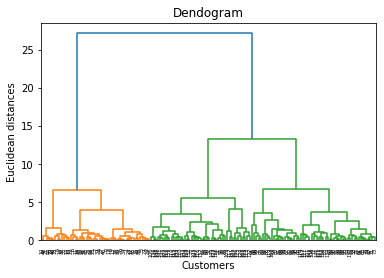

In [38]:
dendogram=sch.dendrogram(sch.linkage(data1,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [39]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data1)

In [40]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2], dtype=int64)

In [41]:
data['cluster_hierar']=y_hc
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_k,cluster_k_pca,cluster_hierar
Species,,,,,,,
Iris-setosa,5.1,3.5,1.4,0.2,1,1,1
Iris-setosa,4.9,3.0,1.4,0.2,1,1,1
Iris-setosa,4.7,3.2,1.3,0.2,1,1,1
Iris-setosa,4.6,3.1,1.5,0.2,1,1,1
Iris-setosa,5.0,3.6,1.4,0.2,1,1,1
...,...,...,...,...,...,...,...
Iris-virginica,6.7,3.0,5.2,2.3,0,0,2
Iris-virginica,6.3,2.5,5.0,1.9,2,0,0
Iris-virginica,6.5,3.0,5.2,2.0,0,0,2


In [42]:
data[data['cluster_hierar']==0]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_k,cluster_k_pca,cluster_hierar
Species,,,,,,,
Iris-setosa,4.5,2.30,1.3,0.3,1,1,0
Iris-versicolor,5.5,2.30,4.0,1.3,2,2,0
Iris-versicolor,6.5,2.80,4.6,1.5,2,2,0
Iris-versicolor,5.7,2.80,4.5,1.3,2,2,0
Iris-versicolor,4.9,2.40,3.3,1.0,2,2,0
Iris-versicolor,6.6,2.90,4.6,1.3,2,2,0
Iris-versicolor,5.2,2.70,3.9,1.4,2,2,0
Iris-versicolor,5.0,2.05,3.5,1.0,2,2,0
Iris-versicolor,5.9,3.00,4.2,1.5,2,2,0


# Hierarchical

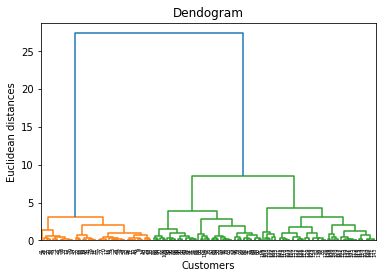

In [43]:
dendogram=sch.dendrogram(sch.linkage(visual,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [44]:
hc_2=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc_pca=hc_2.fit_predict(visual)

In [45]:
y_hc_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
data['cluster_hierar_pca']=y_hc_pca
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_k,cluster_k_pca,cluster_hierar,cluster_hierar_pca
Species,,,,,,,,
Iris-setosa,5.1,3.5,1.4,0.2,1,1,1,1
Iris-setosa,4.9,3.0,1.4,0.2,1,1,1,1
Iris-setosa,4.7,3.2,1.3,0.2,1,1,1,1
Iris-setosa,4.6,3.1,1.5,0.2,1,1,1,1
Iris-setosa,5.0,3.6,1.4,0.2,1,1,1,1
...,...,...,...,...,...,...,...,...
Iris-virginica,6.7,3.0,5.2,2.3,0,0,2,0
Iris-virginica,6.3,2.5,5.0,1.9,2,0,0,0
Iris-virginica,6.5,3.0,5.2,2.0,0,0,2,0


In [47]:
data[data['cluster_hierar_pca']==1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_k,cluster_k_pca,cluster_hierar,cluster_hierar_pca
Species,,,,,,,,
Iris-setosa,5.1,3.50,1.4,0.2,1,1,1,1
Iris-setosa,4.9,3.00,1.4,0.2,1,1,1,1
Iris-setosa,4.7,3.20,1.3,0.2,1,1,1,1
Iris-setosa,4.6,3.10,1.5,0.2,1,1,1,1
Iris-setosa,5.0,3.60,1.4,0.2,1,1,1,1
Iris-setosa,5.4,3.90,1.7,0.4,1,1,1,1
Iris-setosa,4.6,3.40,1.4,0.3,1,1,1,1
Iris-setosa,5.0,3.40,1.5,0.2,1,1,1,1
Iris-setosa,4.4,2.90,1.4,0.2,1,1,1,1


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


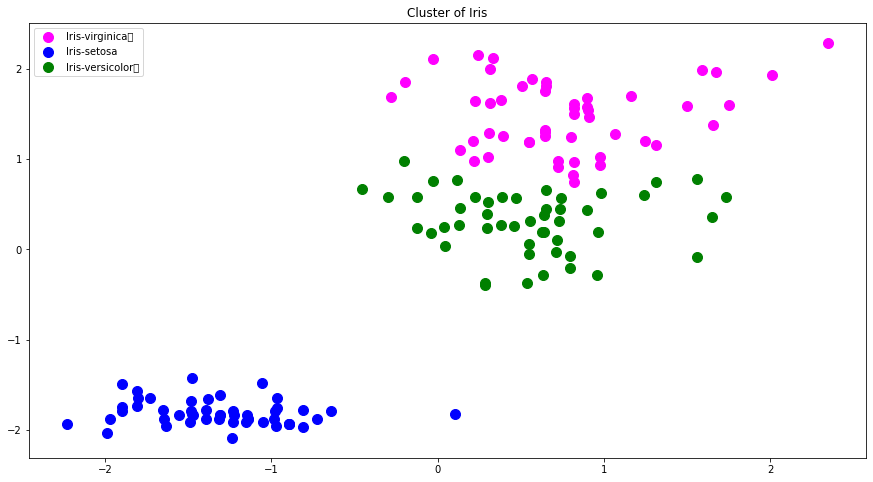

In [48]:
fig = plt.figure(figsize = (15,8))
plt.scatter(visual[y_hc_pca==0,0],visual[y_hc_pca==0,1],s=100,c='magenta',label="Iris-virginica	")
plt.scatter(visual[y_hc_pca==1,0],visual[y_hc_pca==1,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(visual[y_hc_pca==2,0],visual[y_hc_pca==2,1],s=100,c='green',label='Iris-versicolor	')

plt.title('Cluster of Iris')
plt.legend()
plt.ioff()
plt.show()